# CS1470/2470 HW2: Exploring Your Model

### Testing Out Your Model!

Pull in your model into the notebook, test it out using the model that you settle on, and compare it against a keras implementation of your choice! Hypothesize why your implementation may be different. 

#### **Submit as PDF with your final submission!**

**Requirements:**
- Select a model of choice. Can definitely be a single-layer model.
- A brief discussion of your dataset, including links to source, motivation, and preprocessing.
    - This can be pretty brief, since we already discuss MNIST at length. 
    - Feel free to try it on CIFAR, though this is optional!
    - Feel free to reuse code from HW1!
- Brief evaluation of your model. 
- Comparison against a keras model of similar implementation. 
    - *Feel free to use a model of your choice like in 2470 version, but you definitely don't need to do a multi-layered model.*

### **[2470]** Explore Your Own Dataset!

**Same requirements as above, but:**

- You have to pick a different dataset; not MNIST or CIFAR-10. 
- A brief discussion of your dataset, including links to source, motivation, and preprocessing.
- A network architecture motivated by your specific problem. 
    - **MUST BE MULTI-LAYERED!**
    - Discuss motivation for your design choices and hurdles you may have had to overcome. 
- Brief evaluation of your model. 
    - Include a few possible options with evaluations to motivate your final selection of model and hyperparameters. 
    - Include a few qualitative motivations or ablation studies, such as a per-class performance breakdown, visualizations, or similar. 
- Comparison against a keras model of similar implementation.

---

## Dataset

**YOUR DISCUSSION HERE!**

- [**1470**] Feel free to change up the code, but this is probably the easiest way to go about this.
- [**2470**] Modify accordingly. Feel free to make more cell blocks as well!

*Feel free to clear out this markdown cell block and override with your actual discussion.*

In [1]:
## 1470: Feel free to change, but this is probably the easiest way to go about this.
## 2470: Modify accordingly. Feel free to make more cell blocks as well
%load_ext autoreload
%autoreload 1
%aimport Beras, assignment, preprocess

data_path = "../data"

## Import MNIST train and test examples into train and testing data
import preprocess
X0, Y0 = preprocess.get_data_MNIST('train', data_path)
X1, Y1 = preprocess.get_data_MNIST('test',  data_path)

print("Training Shapes:", X0.shape, Y0.shape)
print("Testing  Shapes:", X1.shape, Y1.shape)

Training Shapes: (60000, 784) (60000,)
Testing  Shapes: (10000, 784) (10000,)


## My Beras Model

**YOUR DISCUSSION HERE!**

- [**1470**] Feel free to change up the code, but this is probably the easiest way to go about this.
- [**2470**] Modify accordingly. Feel free to make more cell blocks as well!

*Feel free to clear out this markdown cell block and override with your actual discussion.*

In [3]:
from Beras.onehot import OneHotEncoder
from visualize import visualize_images, visualize_metrics
from assignment import SequentialModel
import numpy as np

## Read in MNIST data, use the OneHotEncoder class to one hot encode the labels,
## instantiate and compile your model, and train your model
ohe = OneHotEncoder()
ohe.fit(np.concatenate([Y0, Y1], axis=-1))

from Beras.activations import Softmax
from Beras.layers import Dense
from Beras.losses import MeanSquaredError
from Beras.metrics import CategoricalAccuracy
from Beras.optimizers import BasicOptimizer

model = SequentialModel([Dense(784, 10), Softmax()])
model.compile(
    optimizer=BasicOptimizer(0.02),
    loss_fn=MeanSquaredError(),
    acc_fn=CategoricalAccuracy(),
)

train_agg_metrics = model.fit(
    X0, ohe(Y0), epochs=10, batch_size=100
)

Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch   1/600 : {'loss': 0.0943, 'acc': 0.1}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch   2/600 : {'loss': 0.0939, 'acc': 0.04}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch   3/600 : {'loss': 0.093, 'acc': 0.06}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch   4/600 : {'loss': 0.0906, 'acc': 0.15}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch   5/600 : {'loss': 0.092, 'acc': 0.12}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  50/600 : {'loss': 0.0888, 'acc': 0.21}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  51/600 : {'loss': 0.0892, 'acc': 0.18}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  52/600 : {'loss': 0.0868, 'acc': 0.26}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  53/600 : {'loss': 0.0873, 'acc': 0.26}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  54/600 : {'loss': 0.0863, 'acc': 0.29}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  55/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  98/600 : {'loss': 0.0795, 'acc': 0.46}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch  99/600 : {'loss': 0.0785, 'acc': 0.52}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 100/600 : {'loss': 0.0832, 'acc': 0.42}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 101/600 : {'loss': 0.0805, 'acc': 0.47}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 102/600 : {'loss': 0.0791, 'acc': 0.5}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 103/600 : {'loss': 0.08

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 150/600 : {'loss': 0.075, 'acc': 0.46}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 151/600 : {'loss': 0.0718, 'acc': 0.54}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 152/600 : {'loss': 0.0745, 'acc': 0.52}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 153/600 : {'loss': 0.0706, 'acc': 0.61}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 154/600 : {'loss': 0.0749, 'acc': 0.49}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 155/600 : {'loss': 0.07

 - Epoch  1: Batch 199/600 : {'loss': 0.0651, 'acc': 0.55}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 200/600 : {'loss': 0.0701, 'acc': 0.57}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 201/600 : {'loss': 0.0703, 'acc': 0.51}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 202/600 : {'loss': 0.073, 'acc': 0.45}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 203/600 : {'loss': 0.0654, 'acc': 0.6}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 204/600 : {'loss': 0.0648, 'acc': 0.6}   Dense compose_to_weight: w (784, 10) 

 - Epoch  1: Batch 249/600 : {'loss': 0.0632, 'acc': 0.54}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 250/600 : {'loss': 0.0672, 'acc': 0.5}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 251/600 : {'loss': 0.0596, 'acc': 0.58}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 252/600 : {'loss': 0.0637, 'acc': 0.56}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 253/600 : {'loss': 0.0607, 'acc': 0.64}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 254/600 : {'loss': 0.0608, 'acc': 0.56}   Dense compose_to_weight: w (784, 10

 - Epoch  1: Batch 299/600 : {'loss': 0.065, 'acc': 0.53}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 300/600 : {'loss': 0.0633, 'acc': 0.61}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 301/600 : {'loss': 0.0628, 'acc': 0.55}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 302/600 : {'loss': 0.0661, 'acc': 0.57}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 303/600 : {'loss': 0.0539, 'acc': 0.71}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 304/600 : {'loss': 0.0563, 'acc': 0.61}   Dense compose_to_weight: w (784, 10

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 346/600 : {'loss': 0.0559, 'acc': 0.64}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 347/600 : {'loss': 0.0535, 'acc': 0.72}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 348/600 : {'loss': 0.0553, 'acc': 0.68}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 349/600 : {'loss': 0.0624, 'acc': 0.58}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 350/600 : {'loss': 0.0569, 'acc': 0.63}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 351/600 : {'loss': 0.0

 - Epoch  1: Batch 398/600 : {'loss': 0.0554, 'acc': 0.73}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 399/600 : {'loss': 0.0532, 'acc': 0.72}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 400/600 : {'loss': 0.0557, 'acc': 0.67}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 401/600 : {'loss': 0.0495, 'acc': 0.74}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 402/600 : {'loss': 0.0505, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 403/600 : {'loss': 0.0487, 'acc': 0.77}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 453/600 : {'loss': 0.0423, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 454/600 : {'loss': 0.0394, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 455/600 : {'loss': 0.0517, 'acc': 0.75}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 456/600 : {'loss': 0.046, 'acc': 0.76}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 457/600 : {'loss': 0.047, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 458/600 : {'loss': 0.0485

 - Epoch  1: Batch 507/600 : {'loss': 0.0436, 'acc': 0.74}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 508/600 : {'loss': 0.0472, 'acc': 0.74}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 509/600 : {'loss': 0.0457, 'acc': 0.72}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 510/600 : {'loss': 0.0349, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 511/600 : {'loss': 0.0377, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 512/600 : {'loss': 0.0432, 'acc': 0.76}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 560/600 : {'loss': 0.0306, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 561/600 : {'loss': 0.038, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 562/600 : {'loss': 0.036, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 563/600 : {'loss': 0.0423, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 564/600 : {'loss': 0.0417, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  1: Batch 565/600 : {'loss': 0.040

 - Epoch  2: Batch   9/600 : {'loss': 0.0375, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  10/600 : {'loss': 0.0413, 'acc': 0.78}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  11/600 : {'loss': 0.0468, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  12/600 : {'loss': 0.0417, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  13/600 : {'loss': 0.0421, 'acc': 0.78}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  14/600 : {'loss': 0.037, 'acc': 0.82}   Dense compose_to_weight: w (784, 10

 - Epoch  2: Batch  62/600 : {'loss': 0.0308, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  63/600 : {'loss': 0.035, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  64/600 : {'loss': 0.0342, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  65/600 : {'loss': 0.0354, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  66/600 : {'loss': 0.0275, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch  67/600 : {'loss': 0.0311, 'acc': 0.84}   Dense compose_to_weight: w (784, 10

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 117/600 : {'loss': 0.0404, 'acc': 0.78}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 118/600 : {'loss': 0.0452, 'acc': 0.68}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 119/600 : {'loss': 0.0367, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 120/600 : {'loss': 0.0358, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 121/600 : {'loss': 0.0353, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 122/600 : {'loss': 0.03

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 170/600 : {'loss': 0.0393, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 171/600 : {'loss': 0.0376, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 172/600 : {'loss': 0.032, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 173/600 : {'loss': 0.0376, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 174/600 : {'loss': 0.0298, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 175/600 : {'loss': 0.03

 - Epoch  2: Batch 219/600 : {'loss': 0.0216, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 220/600 : {'loss': 0.024, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 221/600 : {'loss': 0.0314, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 222/600 : {'loss': 0.0449, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 223/600 : {'loss': 0.0342, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 224/600 : {'loss': 0.0304, 'acc': 0.86}   Dense compose_to_weight: w (784, 10)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 267/600 : {'loss': 0.0355, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 268/600 : {'loss': 0.0356, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 269/600 : {'loss': 0.0337, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 270/600 : {'loss': 0.0281, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 271/600 : {'loss': 0.0291, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 272/600 : {'loss': 0.0

 - Epoch  2: Batch 318/600 : {'loss': 0.0409, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 319/600 : {'loss': 0.0292, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 320/600 : {'loss': 0.0299, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 321/600 : {'loss': 0.0281, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 322/600 : {'loss': 0.0357, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 323/600 : {'loss': 0.0409, 'acc': 0.75}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 396/600 : {'loss': 0.0293, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 397/600 : {'loss': 0.0326, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 398/600 : {'loss': 0.0368, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 399/600 : {'loss': 0.0351, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 400/600 : {'loss': 0.0367, 'acc': 0.75}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 401/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 450/600 : {'loss': 0.0308, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 451/600 : {'loss': 0.0343, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 452/600 : {'loss': 0.0307, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 453/600 : {'loss': 0.0239, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 454/600 : {'loss': 0.0214, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 455/600 : {'loss': 0.03

 - Epoch  2: Batch 499/600 : {'loss': 0.0335, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 500/600 : {'loss': 0.0327, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 501/600 : {'loss': 0.0304, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 502/600 : {'loss': 0.0236, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 503/600 : {'loss': 0.0275, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 504/600 : {'loss': 0.0359, 'acc': 0.76}   Dense compose_to_weight: w (784, 1

 - Epoch  2: Batch 552/600 : {'loss': 0.0216, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 553/600 : {'loss': 0.0226, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 554/600 : {'loss': 0.0235, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 555/600 : {'loss': 0.025, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 556/600 : {'loss': 0.0228, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  2: Batch 557/600 : {'loss': 0.0233, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch   7/600 : {'loss': 0.0343, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch   8/600 : {'loss': 0.0242, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch   9/600 : {'loss': 0.0288, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  10/600 : {'loss': 0.0304, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  11/600 : {'loss': 0.036, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  12/600 : {'loss': 0.030

 - Epoch  3: Batch  56/600 : {'loss': 0.0244, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  57/600 : {'loss': 0.0259, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  58/600 : {'loss': 0.0279, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  59/600 : {'loss': 0.027, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  60/600 : {'loss': 0.0236, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch  61/600 : {'loss': 0.019, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) w

 - Epoch  3: Batch 106/600 : {'loss': 0.0197, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 107/600 : {'loss': 0.0218, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 108/600 : {'loss': 0.0308, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 109/600 : {'loss': 0.0204, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 110/600 : {'loss': 0.0232, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 111/600 : {'loss': 0.0188, 'acc': 0.93}   Dense compose_to_weight: w (784, 1

 - Epoch  3: Batch 158/600 : {'loss': 0.0378, 'acc': 0.76}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 159/600 : {'loss': 0.0342, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 160/600 : {'loss': 0.0255, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 161/600 : {'loss': 0.0312, 'acc': 0.78}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 162/600 : {'loss': 0.0289, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 163/600 : {'loss': 0.0238, 'acc': 0.84}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 211/600 : {'loss': 0.0236, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 212/600 : {'loss': 0.0216, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 213/600 : {'loss': 0.0174, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 214/600 : {'loss': 0.0294, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 215/600 : {'loss': 0.0255, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 216/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 264/600 : {'loss': 0.0274, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 265/600 : {'loss': 0.0279, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 266/600 : {'loss': 0.0278, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 267/600 : {'loss': 0.0294, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 268/600 : {'loss': 0.0297, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 269/600 : {'loss': 0.0

 - Epoch  3: Batch 316/600 : {'loss': 0.0243, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 317/600 : {'loss': 0.0326, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 318/600 : {'loss': 0.0354, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 319/600 : {'loss': 0.0241, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 320/600 : {'loss': 0.0252, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 321/600 : {'loss': 0.0226, 'acc': 0.86}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 365/600 : {'loss': 0.0305, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 366/600 : {'loss': 0.0209, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 367/600 : {'loss': 0.0152, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 368/600 : {'loss': 0.0198, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 369/600 : {'loss': 0.0257, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 370/600 : {'loss': 0.0

 - Epoch  3: Batch 413/600 : {'loss': 0.0287, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 414/600 : {'loss': 0.0337, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 415/600 : {'loss': 0.0311, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 416/600 : {'loss': 0.0321, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 417/600 : {'loss': 0.0208, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 418/600 : {'loss': 0.0295, 'acc': 0.88}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 469/600 : {'loss': 0.0217, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 470/600 : {'loss': 0.0199, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 471/600 : {'loss': 0.0228, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 472/600 : {'loss': 0.02, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 473/600 : {'loss': 0.0312, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 474/600 : {'loss': 0.028

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 525/600 : {'loss': 0.0185, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 526/600 : {'loss': 0.015, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 527/600 : {'loss': 0.0235, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 528/600 : {'loss': 0.0308, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 529/600 : {'loss': 0.0291, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 530/600 : {'loss': 0.03

 - Epoch  3: Batch 573/600 : {'loss': 0.0265, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 574/600 : {'loss': 0.0259, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 575/600 : {'loss': 0.0215, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 576/600 : {'loss': 0.0237, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 577/600 : {'loss': 0.0246, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  3: Batch 578/600 : {'loss': 0.0264, 'acc': 0.85}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  26/600 : {'loss': 0.0184, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  27/600 : {'loss': 0.0208, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  28/600 : {'loss': 0.023, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  29/600 : {'loss': 0.0193, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  30/600 : {'loss': 0.0218, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch  31/600 : {'loss': 0.027

 - Epoch  4: Batch 118/600 : {'loss': 0.0342, 'acc': 0.76}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 119/600 : {'loss': 0.022, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 120/600 : {'loss': 0.0211, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 121/600 : {'loss': 0.0228, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 122/600 : {'loss': 0.0214, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 123/600 : {'loss': 0.0231, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 170/600 : {'loss': 0.027, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 171/600 : {'loss': 0.026, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 172/600 : {'loss': 0.0219, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 173/600 : {'loss': 0.0286, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 174/600 : {'loss': 0.0173, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 175/600 : {'loss': 0.0238

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 221/600 : {'loss': 0.0186, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 222/600 : {'loss': 0.033, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 223/600 : {'loss': 0.0251, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 224/600 : {'loss': 0.0186, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 225/600 : {'loss': 0.028, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 226/600 : {'loss': 0.0412

 - Epoch  4: Batch 269/600 : {'loss': 0.0237, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 270/600 : {'loss': 0.0182, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 271/600 : {'loss': 0.0184, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 272/600 : {'loss': 0.0279, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 273/600 : {'loss': 0.0222, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 274/600 : {'loss': 0.0218, 'acc': 0.88}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 319/600 : {'loss': 0.0219, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 320/600 : {'loss': 0.023, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 321/600 : {'loss': 0.0205, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 322/600 : {'loss': 0.0263, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 323/600 : {'loss': 0.0306, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 324/600 : {'loss': 0.032

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 370/600 : {'loss': 0.0162, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 371/600 : {'loss': 0.023, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 372/600 : {'loss': 0.0223, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 373/600 : {'loss': 0.0235, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 374/600 : {'loss': 0.0293, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 375/600 : {'loss': 0.02

 - Epoch  4: Batch 418/600 : {'loss': 0.0265, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 419/600 : {'loss': 0.0221, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 420/600 : {'loss': 0.0225, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 421/600 : {'loss': 0.0205, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 422/600 : {'loss': 0.026, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 423/600 : {'loss': 0.0303, 'acc': 0.78}   Dense compose_to_weight: w (784, 10

 - Epoch  4: Batch 467/600 : {'loss': 0.0205, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 468/600 : {'loss': 0.0157, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 469/600 : {'loss': 0.0196, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 470/600 : {'loss': 0.0182, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 471/600 : {'loss': 0.0208, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 472/600 : {'loss': 0.0176, 'acc': 0.92}   Dense compose_to_weight: w (784, 10

 - Epoch  4: Batch 517/600 : {'loss': 0.017, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 518/600 : {'loss': 0.0179, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 519/600 : {'loss': 0.0179, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 520/600 : {'loss': 0.0229, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 521/600 : {'loss': 0.0282, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 522/600 : {'loss': 0.0352, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 567/600 : {'loss': 0.025, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 568/600 : {'loss': 0.0148, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 569/600 : {'loss': 0.0187, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 570/600 : {'loss': 0.0164, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 571/600 : {'loss': 0.0225, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  4: Batch 572/600 : {'loss': 0.014

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  17/600 : {'loss': 0.0188, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  18/600 : {'loss': 0.0136, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  19/600 : {'loss': 0.018, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  20/600 : {'loss': 0.016, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  21/600 : {'loss': 0.0207, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  22/600 : {'loss': 0.0129

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  68/600 : {'loss': 0.0173, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  69/600 : {'loss': 0.0267, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  70/600 : {'loss': 0.0257, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  71/600 : {'loss': 0.0216, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  72/600 : {'loss': 0.019, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch  73/600 : {'loss': 0.03

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 120/600 : {'loss': 0.0188, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 121/600 : {'loss': 0.0207, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 122/600 : {'loss': 0.02, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 123/600 : {'loss': 0.0215, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 124/600 : {'loss': 0.0235, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 125/600 : {'loss': 0.0244

 - Epoch  5: Batch 199/600 : {'loss': 0.0203, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 200/600 : {'loss': 0.0207, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 201/600 : {'loss': 0.0271, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 202/600 : {'loss': 0.0217, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 203/600 : {'loss': 0.0216, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 204/600 : {'loss': 0.0173, 'acc': 0.92}   Dense compose_to_weight: w (784, 10)

 - Epoch  5: Batch 249/600 : {'loss': 0.0173, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 250/600 : {'loss': 0.0273, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 251/600 : {'loss': 0.0182, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 252/600 : {'loss': 0.0199, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 253/600 : {'loss': 0.0199, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 254/600 : {'loss': 0.0189, 'acc': 0.86}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 298/600 : {'loss': 0.0269, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 299/600 : {'loss': 0.0277, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 300/600 : {'loss': 0.0288, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 301/600 : {'loss': 0.0256, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 302/600 : {'loss': 0.029, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 303/600 : {'loss': 0.01

 - Epoch  5: Batch 354/600 : {'loss': 0.0169, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 355/600 : {'loss': 0.0222, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 356/600 : {'loss': 0.0176, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 357/600 : {'loss': 0.0258, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 358/600 : {'loss': 0.0153, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 359/600 : {'loss': 0.0174, 'acc': 0.9}   Dense compose_to_weight: w (784, 10

 - Epoch  5: Batch 402/600 : {'loss': 0.0186, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 403/600 : {'loss': 0.0172, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 404/600 : {'loss': 0.017, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 405/600 : {'loss': 0.0224, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 406/600 : {'loss': 0.0225, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 407/600 : {'loss': 0.0174, 'acc': 0.92}   Dense compose_to_weight: w (784, 10)

 - Epoch  5: Batch 455/600 : {'loss': 0.0269, 'acc': 0.78}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 456/600 : {'loss': 0.022, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 457/600 : {'loss': 0.0216, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 458/600 : {'loss': 0.0202, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 459/600 : {'loss': 0.0256, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 460/600 : {'loss': 0.0216, 'acc': 0.9}   Dense compose_to_weight: w (784, 10)

 - Epoch  5: Batch 510/600 : {'loss': 0.0136, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 511/600 : {'loss': 0.0134, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 512/600 : {'loss': 0.0231, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 513/600 : {'loss': 0.0232, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 514/600 : {'loss': 0.0199, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 515/600 : {'loss': 0.0128, 'acc': 0.94}   Dense compose_to_weight: w (784, 1

 - Epoch  5: Batch 563/600 : {'loss': 0.0229, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 564/600 : {'loss': 0.0209, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 565/600 : {'loss': 0.0223, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 566/600 : {'loss': 0.0134, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 567/600 : {'loss': 0.024, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  5: Batch 568/600 : {'loss': 0.0133, 'acc': 0.93}   Dense compose_to_weight: w (784, 10

 - Epoch  6: Batch  18/600 : {'loss': 0.0125, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  19/600 : {'loss': 0.0166, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  20/600 : {'loss': 0.0145, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  21/600 : {'loss': 0.0198, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  22/600 : {'loss': 0.012, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  23/600 : {'loss': 0.0171, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  65/600 : {'loss': 0.0206, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  66/600 : {'loss': 0.0116, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  67/600 : {'loss': 0.0158, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  68/600 : {'loss': 0.016, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  69/600 : {'loss': 0.0251, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch  70/600 : {'loss': 0.02

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 115/600 : {'loss': 0.0147, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 116/600 : {'loss': 0.0267, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 117/600 : {'loss': 0.0247, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 118/600 : {'loss': 0.0311, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 119/600 : {'loss': 0.0187, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 120/600 : {'loss': 0.01

 - Epoch  6: Batch 167/600 : {'loss': 0.0228, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 168/600 : {'loss': 0.0222, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 169/600 : {'loss': 0.0213, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 170/600 : {'loss': 0.0235, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 171/600 : {'loss': 0.0226, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 172/600 : {'loss': 0.0194, 'acc': 0.87}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 221/600 : {'loss': 0.015, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 222/600 : {'loss': 0.0291, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 223/600 : {'loss': 0.0226, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 224/600 : {'loss': 0.0149, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 225/600 : {'loss': 0.0247, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 226/600 : {'loss': 0.03

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 273/600 : {'loss': 0.0199, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 274/600 : {'loss': 0.0185, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 275/600 : {'loss': 0.0226, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 276/600 : {'loss': 0.0144, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 277/600 : {'loss': 0.0197, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 278/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 324/600 : {'loss': 0.0304, 'acc': 0.79}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 325/600 : {'loss': 0.0305, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 326/600 : {'loss': 0.0223, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 327/600 : {'loss': 0.0158, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 328/600 : {'loss': 0.0204, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 329/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 376/600 : {'loss': 0.0262, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 377/600 : {'loss': 0.0177, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 378/600 : {'loss': 0.0186, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 379/600 : {'loss': 0.0183, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 380/600 : {'loss': 0.0183, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 381/600 : {'loss': 0.0189

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 428/600 : {'loss': 0.0185, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 429/600 : {'loss': 0.0207, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 430/600 : {'loss': 0.0247, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 431/600 : {'loss': 0.0268, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 432/600 : {'loss': 0.015, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 433/600 : {'loss': 0.017

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 478/600 : {'loss': 0.0206, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 479/600 : {'loss': 0.0136, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 480/600 : {'loss': 0.0247, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 481/600 : {'loss': 0.0142, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 482/600 : {'loss': 0.0106, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 483/600 : {'loss': 0.0

 - Epoch  6: Batch 528/600 : {'loss': 0.0257, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 529/600 : {'loss': 0.0255, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 530/600 : {'loss': 0.0269, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 531/600 : {'loss': 0.0201, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 532/600 : {'loss': 0.0185, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 533/600 : {'loss': 0.0137, 'acc': 0.94}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 579/600 : {'loss': 0.0147, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 580/600 : {'loss': 0.0149, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 581/600 : {'loss': 0.0157, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 582/600 : {'loss': 0.0117, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 583/600 : {'loss': 0.0075, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  6: Batch 584/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  31/600 : {'loss': 0.0224, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  32/600 : {'loss': 0.0142, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  33/600 : {'loss': 0.0185, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  34/600 : {'loss': 0.0172, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  35/600 : {'loss': 0.0142, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  36/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  83/600 : {'loss': 0.0285, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  84/600 : {'loss': 0.0156, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  85/600 : {'loss': 0.0231, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  86/600 : {'loss': 0.0144, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  87/600 : {'loss': 0.0255, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch  88/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 135/600 : {'loss': 0.0118, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 136/600 : {'loss': 0.0123, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 137/600 : {'loss': 0.0225, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 138/600 : {'loss': 0.0201, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 139/600 : {'loss': 0.0191, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 140/600 : {'loss': 0.02

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 186/600 : {'loss': 0.012, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 187/600 : {'loss': 0.0163, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 188/600 : {'loss': 0.013, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 189/600 : {'loss': 0.0143, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 190/600 : {'loss': 0.016, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 191/600 : {'loss': 0.0209

 - Epoch  7: Batch 234/600 : {'loss': 0.0177, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 235/600 : {'loss': 0.0176, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 236/600 : {'loss': 0.0164, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 237/600 : {'loss': 0.0199, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 238/600 : {'loss': 0.0187, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 239/600 : {'loss': 0.0211, 'acc': 0.89}   Dense compose_to_weight: w (784, 10)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 286/600 : {'loss': 0.0148, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 287/600 : {'loss': 0.027, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 288/600 : {'loss': 0.0183, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 289/600 : {'loss': 0.0117, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 290/600 : {'loss': 0.0168, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 291/600 : {'loss': 0.01

 - Epoch  7: Batch 337/600 : {'loss': 0.0124, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 338/600 : {'loss': 0.0166, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 339/600 : {'loss': 0.0092, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 340/600 : {'loss': 0.0097, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 341/600 : {'loss': 0.0171, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 342/600 : {'loss': 0.0134, 'acc': 0.91}   Dense compose_to_weight: w (784, 10

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 391/600 : {'loss': 0.0124, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 392/600 : {'loss': 0.0162, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 393/600 : {'loss': 0.0174, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 394/600 : {'loss': 0.0282, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 395/600 : {'loss': 0.0272, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 396/600 : {'loss': 0.01

 - Epoch  7: Batch 440/600 : {'loss': 0.0207, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 441/600 : {'loss': 0.0158, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 442/600 : {'loss': 0.024, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 443/600 : {'loss': 0.0233, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 444/600 : {'loss': 0.0244, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 445/600 : {'loss': 0.0189, 'acc': 0.9}   Dense compose_to_weight: w (784, 10)

 - Epoch  7: Batch 517/600 : {'loss': 0.0144, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 518/600 : {'loss': 0.0147, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 519/600 : {'loss': 0.0137, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 520/600 : {'loss': 0.0207, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 521/600 : {'loss': 0.0251, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 522/600 : {'loss': 0.0311, 'acc': 0.8}   Dense compose_to_weight: w (784, 10

 - Epoch  7: Batch 570/600 : {'loss': 0.0136, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 571/600 : {'loss': 0.0184, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 572/600 : {'loss': 0.0114, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 573/600 : {'loss': 0.0196, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 574/600 : {'loss': 0.0198, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  7: Batch 575/600 : {'loss': 0.0155, 'acc': 0.92}   Dense compose_to_weight: w (784, 1

 - Epoch  8: Batch  18/600 : {'loss': 0.0111, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  19/600 : {'loss': 0.015, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  20/600 : {'loss': 0.0126, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  21/600 : {'loss': 0.0187, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  22/600 : {'loss': 0.0108, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  23/600 : {'loss': 0.0155, 'acc': 0.91}   Dense compose_to_weight: w (784, 10

 - Epoch  8: Batch  66/600 : {'loss': 0.0105, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  67/600 : {'loss': 0.0146, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  68/600 : {'loss': 0.0143, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  69/600 : {'loss': 0.0231, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  70/600 : {'loss': 0.0227, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch  71/600 : {'loss': 0.0182, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 117/600 : {'loss': 0.0231, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 118/600 : {'loss': 0.0294, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 119/600 : {'loss': 0.0171, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 120/600 : {'loss': 0.0153, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 121/600 : {'loss': 0.0176, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 122/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 170/600 : {'loss': 0.0216, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 171/600 : {'loss': 0.0209, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 172/600 : {'loss': 0.0183, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 173/600 : {'loss': 0.0243, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 174/600 : {'loss': 0.0113, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 175/600 : {'loss': 0.0

 - Epoch  8: Batch 219/600 : {'loss': 0.0091, 'acc': 0.98}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 220/600 : {'loss': 0.015, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 221/600 : {'loss': 0.0132, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 222/600 : {'loss': 0.0269, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 223/600 : {'loss': 0.0212, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 224/600 : {'loss': 0.0128, 'acc': 0.93}   Dense compose_to_weight: w (784, 10)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 272/600 : {'loss': 0.025, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 273/600 : {'loss': 0.0188, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 274/600 : {'loss': 0.0168, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 275/600 : {'loss': 0.0209, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 276/600 : {'loss': 0.0134, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 277/600 : {'loss': 0.01

 - Epoch  8: Batch 326/600 : {'loss': 0.0205, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 327/600 : {'loss': 0.0143, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 328/600 : {'loss': 0.0188, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 329/600 : {'loss': 0.0143, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 330/600 : {'loss': 0.0137, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 331/600 : {'loss': 0.021, 'acc': 0.86}   Dense compose_to_weight: w (784, 10)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 374/600 : {'loss': 0.0265, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 375/600 : {'loss': 0.0265, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 376/600 : {'loss': 0.025, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 377/600 : {'loss': 0.0163, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 378/600 : {'loss': 0.0173, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 379/600 : {'loss': 0.0163

 - Epoch  8: Batch 423/600 : {'loss': 0.026, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 424/600 : {'loss': 0.0243, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 425/600 : {'loss': 0.0205, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 426/600 : {'loss': 0.018, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 427/600 : {'loss': 0.0167, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 428/600 : {'loss': 0.0175, 'acc': 0.91}   Dense compose_to_weight: w (784, 10)

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 475/600 : {'loss': 0.0214, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 476/600 : {'loss': 0.0146, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 477/600 : {'loss': 0.0244, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 478/600 : {'loss': 0.0195, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 479/600 : {'loss': 0.0126, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 480/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 524/600 : {'loss': 0.0169, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 525/600 : {'loss': 0.013, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 526/600 : {'loss': 0.0107, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 527/600 : {'loss': 0.0182, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 528/600 : {'loss': 0.0241, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 529/600 : {'loss': 0.0247

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 572/600 : {'loss': 0.0109, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 573/600 : {'loss': 0.0187, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 574/600 : {'loss': 0.0191, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 575/600 : {'loss': 0.0148, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 576/600 : {'loss': 0.0184, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  8: Batch 577/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  23/600 : {'loss': 0.0149, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  24/600 : {'loss': 0.0136, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  25/600 : {'loss': 0.0173, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  26/600 : {'loss': 0.0109, 'acc': 0.97}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  27/600 : {'loss': 0.0163, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  28/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  73/600 : {'loss': 0.0263, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  74/600 : {'loss': 0.022, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  75/600 : {'loss': 0.0141, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  76/600 : {'loss': 0.0162, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  77/600 : {'loss': 0.0182, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch  78/600 : {'loss': 0.01

 - Epoch  9: Batch 121/600 : {'loss': 0.017, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 122/600 : {'loss': 0.0177, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 123/600 : {'loss': 0.0185, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 124/600 : {'loss': 0.0205, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 125/600 : {'loss': 0.0212, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 126/600 : {'loss': 0.0209, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) 

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 176/600 : {'loss': 0.0282, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 177/600 : {'loss': 0.0208, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 178/600 : {'loss': 0.0234, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 179/600 : {'loss': 0.0204, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 180/600 : {'loss': 0.0127, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 181/600 : {'loss': 0.0

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 227/600 : {'loss': 0.0205, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 228/600 : {'loss': 0.0196, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 229/600 : {'loss': 0.0152, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 230/600 : {'loss': 0.0096, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 231/600 : {'loss': 0.0185, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 232/600 : {'loss': 0.0

 - Epoch  9: Batch 276/600 : {'loss': 0.0131, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 277/600 : {'loss': 0.0183, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 278/600 : {'loss': 0.0194, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 279/600 : {'loss': 0.0158, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 280/600 : {'loss': 0.0123, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 281/600 : {'loss': 0.0089, 'acc': 0.95}   Dense compose_to_weight: w (784, 10)

 - Epoch  9: Batch 325/600 : {'loss': 0.0278, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 326/600 : {'loss': 0.0199, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 327/600 : {'loss': 0.0138, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 328/600 : {'loss': 0.0183, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 329/600 : {'loss': 0.0139, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 330/600 : {'loss': 0.0132, 'acc': 0.9}   Dense compose_to_weight: w (784, 10

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 374/600 : {'loss': 0.0261, 'acc': 0.82}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 375/600 : {'loss': 0.0262, 'acc': 0.81}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 376/600 : {'loss': 0.0246, 'acc': 0.8}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 377/600 : {'loss': 0.0158, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 378/600 : {'loss': 0.0168, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 379/600 : {'loss': 0.01

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 427/600 : {'loss': 0.0161, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 428/600 : {'loss': 0.0172, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 429/600 : {'loss': 0.0197, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 430/600 : {'loss': 0.0224, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 431/600 : {'loss': 0.0232, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 432/600 : {'loss': 0.01

 - Epoch  9: Batch 475/600 : {'loss': 0.0208, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 476/600 : {'loss': 0.0142, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 477/600 : {'loss': 0.0238, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 478/600 : {'loss': 0.0191, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 479/600 : {'loss': 0.0122, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 480/600 : {'loss': 0.0233, 'acc': 0.85}   Dense compose_to_weight: w (784, 1

 - Epoch  9: Batch 527/600 : {'loss': 0.0177, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 528/600 : {'loss': 0.0234, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 529/600 : {'loss': 0.0245, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 530/600 : {'loss': 0.0259, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 531/600 : {'loss': 0.0187, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 532/600 : {'loss': 0.0166, 'acc': 0.9}   Dense compose_to_weight: w (784, 10)

 - Epoch  9: Batch 577/600 : {'loss': 0.0185, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 578/600 : {'loss': 0.0194, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 579/600 : {'loss': 0.0128, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 580/600 : {'loss': 0.0131, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 581/600 : {'loss': 0.0138, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch  9: Batch 582/600 : {'loss': 0.0101, 'acc': 0.94}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  28/600 : {'loss': 0.0177, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  29/600 : {'loss': 0.0152, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  30/600 : {'loss': 0.0159, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  31/600 : {'loss': 0.0203, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  32/600 : {'loss': 0.012, 'acc': 0.97}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  33/600 : {'loss': 0.016

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  82/600 : {'loss': 0.0208, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  83/600 : {'loss': 0.0264, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  84/600 : {'loss': 0.0135, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  85/600 : {'loss': 0.0221, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  86/600 : {'loss': 0.013, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch  87/600 : {'loss': 0.02

 - Epoch 10: Batch 131/600 : {'loss': 0.0316, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 132/600 : {'loss': 0.0233, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 133/600 : {'loss': 0.0126, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 134/600 : {'loss': 0.0168, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 135/600 : {'loss': 0.0107, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 136/600 : {'loss': 0.0115, 'acc': 0.93}   Dense compose_to_weight: w (784, 10

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 184/600 : {'loss': 0.0114, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 185/600 : {'loss': 0.021, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 186/600 : {'loss': 0.0109, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 187/600 : {'loss': 0.0144, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 188/600 : {'loss': 0.0118, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 189/600 : {'loss': 0.01

 - Epoch 10: Batch 235/600 : {'loss': 0.0164, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 236/600 : {'loss': 0.0149, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 237/600 : {'loss': 0.0182, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 238/600 : {'loss': 0.017, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 239/600 : {'loss': 0.0197, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 240/600 : {'loss': 0.0177, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) w

 - Epoch 10: Batch 286/600 : {'loss': 0.0135, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 287/600 : {'loss': 0.0255, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 288/600 : {'loss': 0.017, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 289/600 : {'loss': 0.0101, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 290/600 : {'loss': 0.0154, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 291/600 : {'loss': 0.0164, 'acc': 0.91}   Dense compose_to_weight: w (784, 10

 - Epoch 10: Batch 338/600 : {'loss': 0.0152, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 339/600 : {'loss': 0.0081, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 340/600 : {'loss': 0.0084, 'acc': 0.96}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 341/600 : {'loss': 0.0154, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 342/600 : {'loss': 0.0118, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 343/600 : {'loss': 0.0096, 'acc': 0.95}   Dense compose_to_weight: w (784, 1

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 390/600 : {'loss': 0.0117, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 391/600 : {'loss': 0.0109, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 392/600 : {'loss': 0.0149, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 393/600 : {'loss': 0.0163, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 394/600 : {'loss': 0.0271, 'acc': 0.84}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 395/600 : {'loss': 0.0

 - Epoch 10: Batch 471/600 : {'loss': 0.0162, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 472/600 : {'loss': 0.0135, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 473/600 : {'loss': 0.0241, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 474/600 : {'loss': 0.0189, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 475/600 : {'loss': 0.0203, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 476/600 : {'loss': 0.0138, 'acc': 0.94}   Dense compose_to_weight: w (784, 1

 - Epoch 10: Batch 523/600 : {'loss': 0.021, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 524/600 : {'loss': 0.0162, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 525/600 : {'loss': 0.0122, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 526/600 : {'loss': 0.01, 'acc': 0.95}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 527/600 : {'loss': 0.0174, 'acc': 0.9}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 528/600 : {'loss': 0.0229, 'acc': 0.87}   Dense compose_to_weight: w (784, 10) w

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 575/600 : {'loss': 0.0137, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 576/600 : {'loss': 0.0177, 'acc': 0.88}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 577/600 : {'loss': 0.0181, 'acc': 0.91}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 578/600 : {'loss': 0.0189, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 579/600 : {'loss': 0.0124, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Epoch 10: Batch 580/600 : {'loss': 0.0

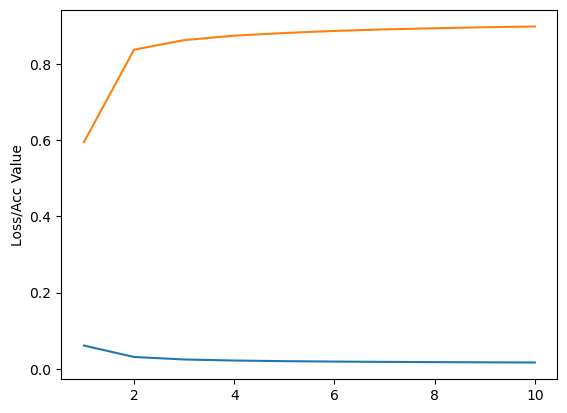

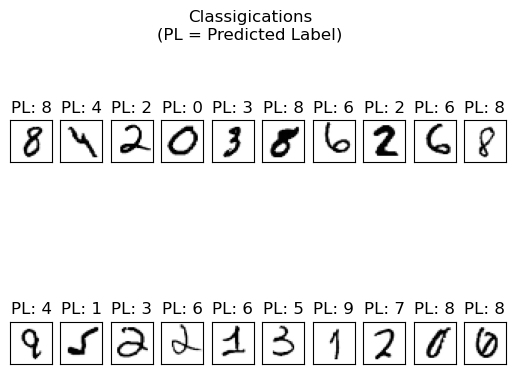

Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   1/100 : {'loss': 0.0136, 'acc': 0.94}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   2/100 : {'loss': 0.0138, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   3/100 : {'loss': 0.0164, 'acc': 0.92}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   4/100 : {'loss': 0.0211, 'acc': 0.86}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   5/100 : {'loss': 0.0217, 'acc': 0.85}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch   6/100 : {'loss

Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  94/100 : {'loss': 0.0048, 'acc': 0.99}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  95/100 : {'loss': 0.0067, 'acc': 0.97}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  96/100 : {'loss': 0.0106, 'acc': 0.93}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  97/100 : {'loss': 0.0176, 'acc': 0.89}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  98/100 : {'loss': 0.0319, 'acc': 0.77}   Dense compose_to_weight: w (784, 10) wg (100, 784, 1) J (100, 10)
Dense compose_to_weight: w (10,) wg (10,) J (100, 10)
 - Batch  99/100 : {'loss': 0.0254, 'acc': 0.83}   Dense compose_to_weight: w (784, 10) wg 

NameError: name 'e' is not defined

In [4]:
from visualize import visualize_images, visualize_metrics

visualize_metrics(train_agg_metrics["loss"], train_agg_metrics["acc"])
visualize_images(model, X0, ohe(Y0))
test_agg_metrics = model.evaluate(X1, ohe(Y1), batch_size=100)
test_agg_metrics

## Keras Model Comparison

## Model Analysis

**[Required only for 2470; Feel free to delete section otherwise]**

## Discussions

Final thoughts? This can be whatever :)